In [1]:
#generate a new token to extract data from kaggle api

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download salader/dogs-vs-cats
#download entire folder from kaggle

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:08<00:00, 144MB/s]
100% 1.06G/1.06G [00:08<00:00, 133MB/s]


In [3]:
#unzip the folder
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
conv_base = VGG16(
weights = 'imagenet', include_top = False,
                input_shape = (150,150,3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())

model.add(Dense(128,  activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,763,521 (60.13 MB)

 Trainable params: 15,763,521 (60.13 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
conv_base.trainable = False

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,763,521 (60.13 MB)

 Trainable params: 1,048,833 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:


train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True

)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    batch_size = 32, target_size = (150,150),
    class_mode = 'binary'
)

test_generator = train_datagen.flow_from_directory(
    '/content/test',
    batch_size = 32, target_size = (150,150),
    class_mode = 'binary'
)



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [12]:
history = model.fit(train_generator, epochs = 10, validation_data = test_generator)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 190s 281ms/step - accuracy: 0.8345 - loss: 0.3721 - val_accuracy: 0.8822 - val_loss: 0.2660
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 174s 276ms/step - accuracy: 0.8947 - loss: 0.2491 - val_accuracy: 0.9050 - val_loss: 0.2279
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 171s 271ms/step - accuracy: 0.9089 - loss: 0.2164 - val_accuracy: 0.9054 - val_loss: 0.2241
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 169s 269ms/step - accuracy: 0.9131 - loss: 0.1985 - val_accuracy: 0.8944 - val_loss: 0.2399
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 266ms/step - accuracy: 0.9118 - loss: 0.2048 - val_accuracy: 0.9110 - val_loss: 0.2113
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 273ms/step - accuracy: 0.9219 - loss: 0.1874 - val_accuracy: 0.9020 - val_loss: 0.2280
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 178s 282ms/step - accuracy: 0.9221 - loss: 0.1825 - val_accuracy: 0.9038 - val_loss: 0.2249
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 280ms/step - accuracy: 0.9248 - loss: 0.17

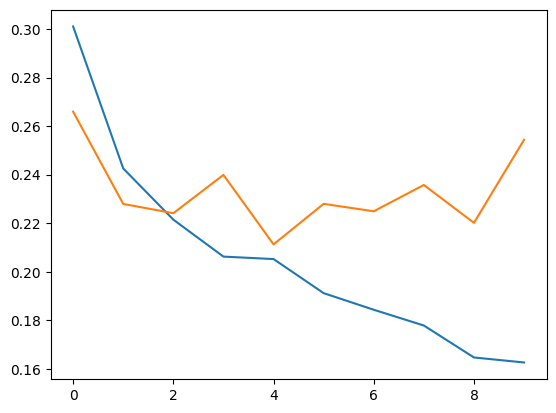

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

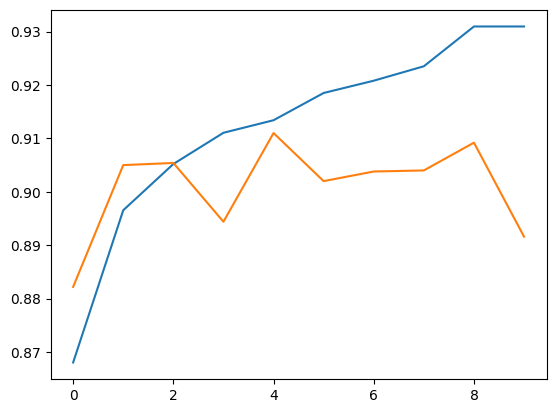

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Overfitting is reduced